<h1><center> Credit Card Fraud Detection </center></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\credit card fraud\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset contains transactions made by credit cards that occurred within two days, where we have **492 frauds** out of **284,807 transactions**. The dataset is **highly unbalanced**, the **positive class (frauds)** account for **0.172%** of all transactions.  

It contains only numerical input variables which are the result of a **PCA transformation**. The original features and more background information about the data are not provided due to confidentiality issues.  

- Features **V1** to **V28** are the **principal components** obtained with **PCA**;  
- Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.   
- Feature **Class** is the response variable and it takes value **1** in case of fraud and **0** otherwise.  

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hour,Time_min
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727,14.046470,28.997044
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,5.835854,17.427849
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,10.000000,14.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,15.000000,29.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,19.000000,44.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,23.000000,59.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       284807 non-null  float64
 1   V1         284807 non-null  float64
 2   V2         284807 non-null  float64
 3   V3         284807 non-null  float64
 4   V4         284807 non-null  float64
 5   V5         284807 non-null  float64
 6   V6         284807 non-null  float64
 7   V7         284807 non-null  float64
 8   V8         284807 non-null  float64
 9   V9         284807 non-null  float64
 10  V10        284807 non-null  float64
 11  V11        284807 non-null  float64
 12  V12        284807 non-null  float64
 13  V13        284807 non-null  float64
 14  V14        284807 non-null  float64
 15  V15        284807 non-null  float64
 16  V16        284807 non-null  float64
 17  V17        284807 non-null  float64
 18  V18        284807 non-null  float64
 19  V19        284807 non-n

Non-fraud transactions: 99.827%
Fraud transactions: 0.173%


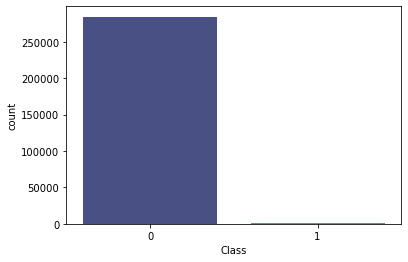

In [10]:
sns.countplot(df.Class, palette = 'mako')
print('Non-fraud transactions: {}%'.format(round(df.Class.value_counts()[0]/len(df)*100.0,3)))
print('Fraud transactions: {}%'.format(round(df.Class.value_counts()[1]/len(df)*100.0,3)))

This dataset is severely imbalanced with 99.83% not fraud cases. So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use **undersampling** and **oversampling** data approach techniques.   
**Oversampling** increases the number of minority class members in the training set but it is prone to overfitting. We are going to use **SMOTE (Synthetic Minority Oversampling Technique)** to make our dataset balanced. It creates synthetic points from the minority class.

Also we shouldn't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead we should use f1-score, precision/recall score (AUC score) and confusion matrix

### Time and other feature engineering

In [31]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)

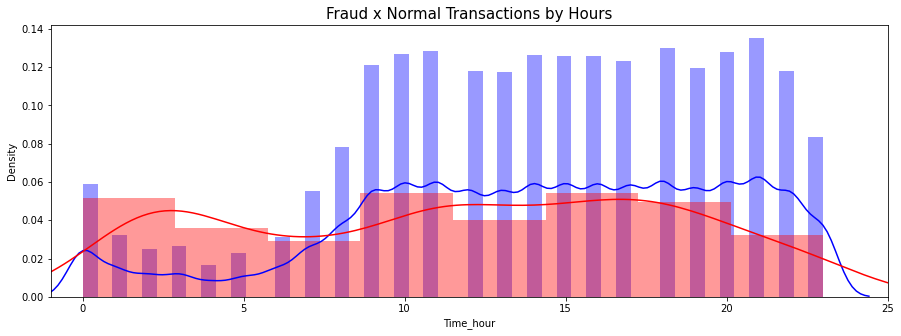

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], color='b')
sns.distplot(df[df['Class'] == 1]["Time_hour"], color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=15)
plt.xlim([-1,25])
plt.show()

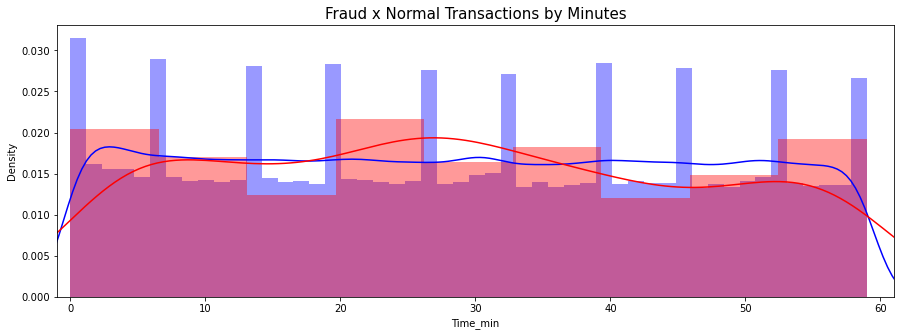

In [19]:
plt.figure(figsize = (15,5))
sns.distplot(df[df.Class == 0]['Time_min'], color = 'b')
sns.distplot(df[df.Class == 1]['Time_min'], color = 'r')
plt.title('Fraud x Normal Transactions by Minutes', fontsize=15)
plt.xlim([-1,61])
plt.show()

Interesting distribuition, but does't seems like a clear pattern of action

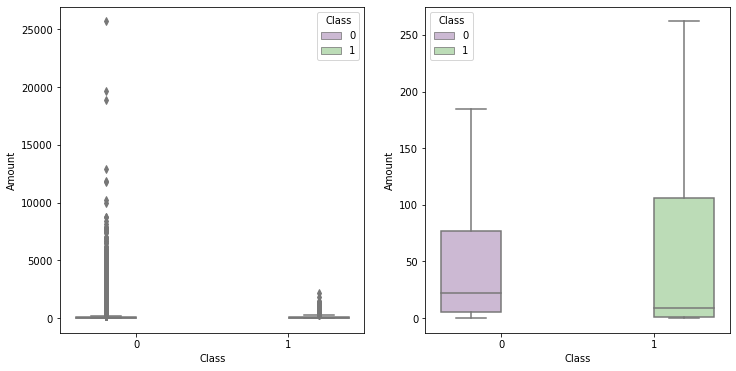

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have highest values

In [24]:
print('Normal Transactions Statistics')
df[df.Class == 0]['Amount'].describe()

Normal Transactions Statistics


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [25]:
print('Fraud Transactions Statistics')
df[df.Class == 1]['Amount'].describe()

Fraud Transactions Statistics


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a smaller mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1, larger Q3 and Q4 and smaller outliers

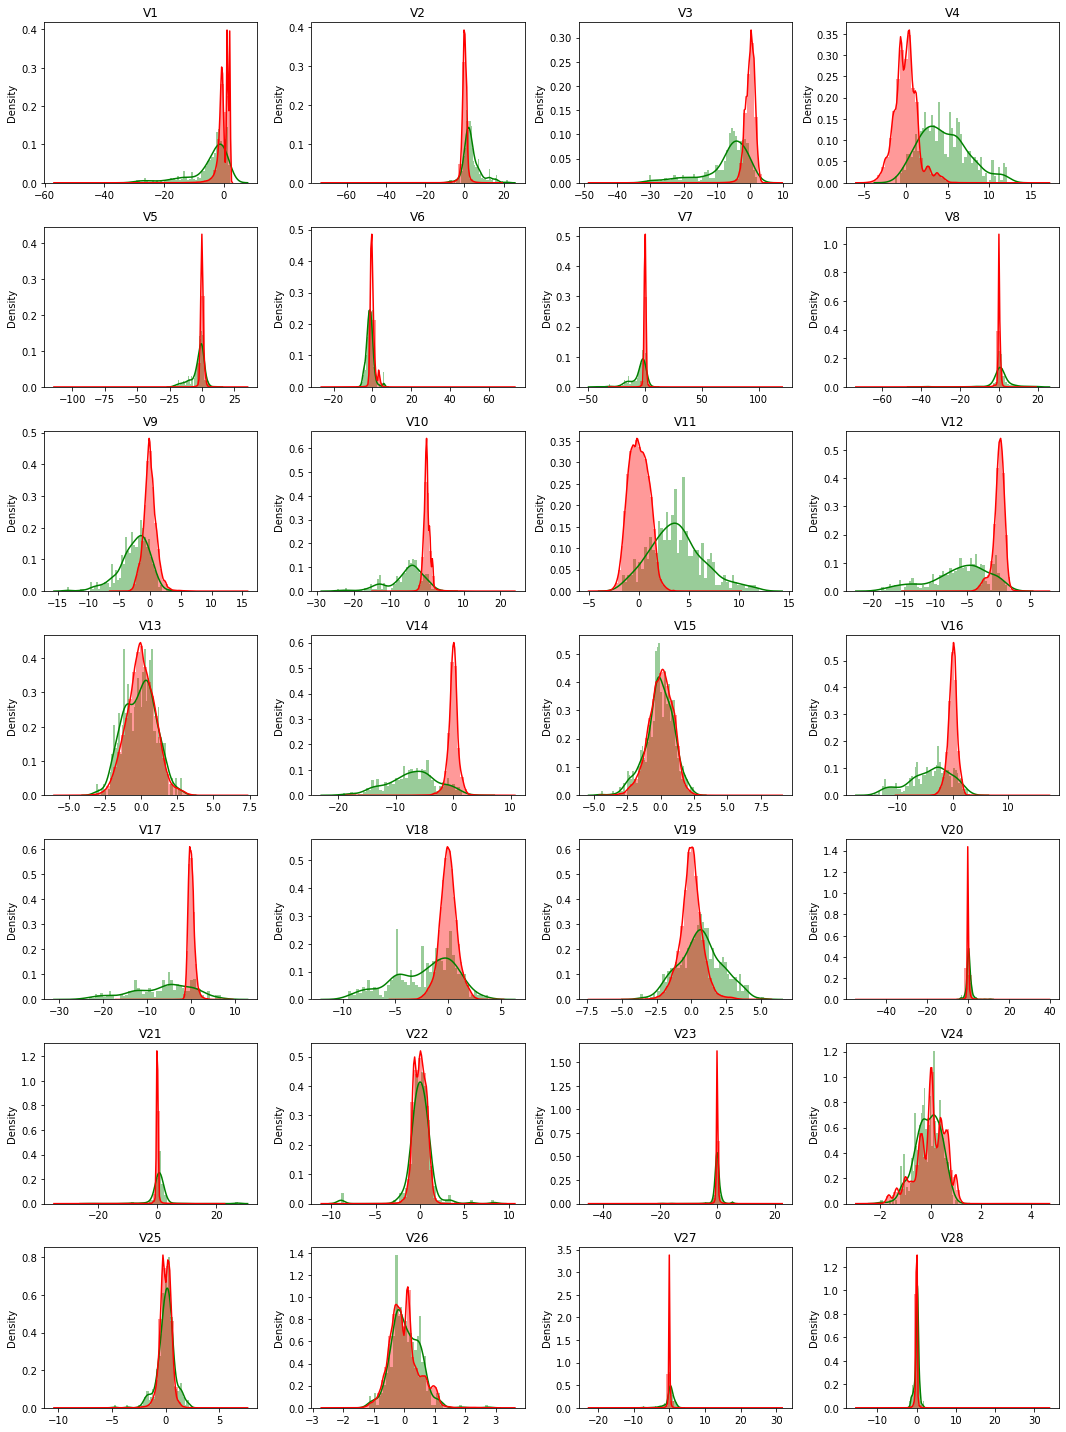

In [26]:
#Looking the V's features
columns = df.iloc[:,1:29].columns
grid = gridspec.GridSpec(7, 4)
plt.figure(figsize=(15,20))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][df.Class == 1], bins = 50, color='b')
    sns.distplot(df[col][df.Class == 0], bins = 50, color='r')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.tight_layout()
plt.show()

We can see a interesting different distribuition in some of our features like V4, V9, V11, V12, V16, V17, V18 and a lot more.

#### Feature Selection

In [32]:
# We will select the variables where fraud class have a interesting behavior and might can help us predict

df_set = df[["Time_hour","Time_min","V1","V2","V3","V4","V7","V9","V10","V11","V12","V14","V16","V17","V18","V19","V26","V27","Amount","Class"]]

### Features Correlation

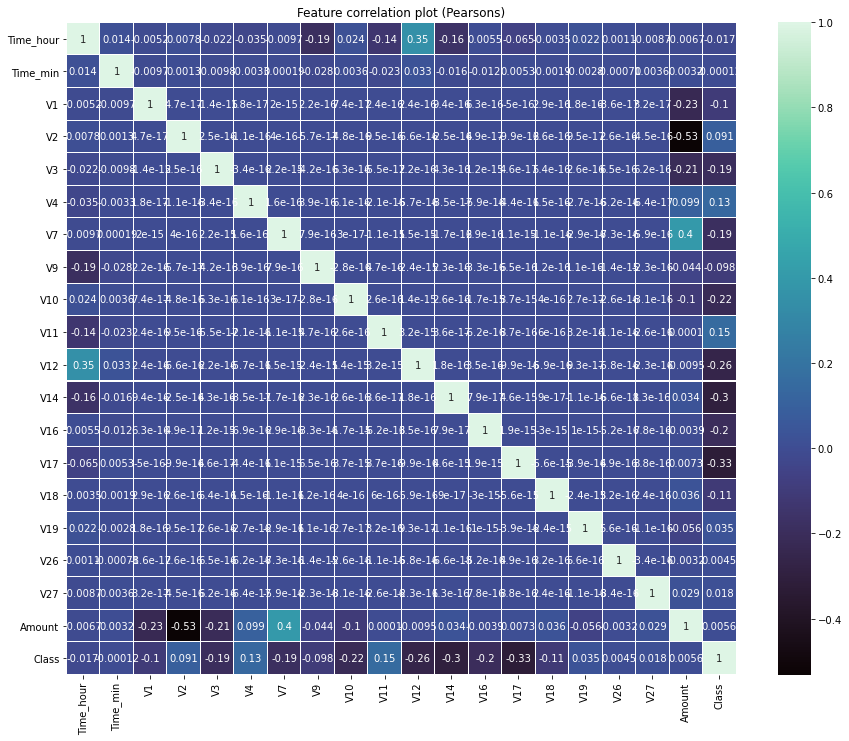

In [28]:
plt.figure(figsize = (15,12))
plt.title('Feature correlation plot (Pearsons)')
corr = df_set.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, annot=True, cmap="mako")
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (direct correlation with V12) and Amount (direct correlation with V7, inverse correlation with V1, V2 and V3).

To normalize the distribution, it is better to use the Robust Scaler algorithm because it's robust to outliers

In [33]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
df_set['Time_hour'] = rb.fit_transform(df_set.Time_hour.values.reshape(-1,1))
df_set['Time_min'] = rb.fit_transform(df_set.Time_min.values.reshape(-1,1))
df_set['Amount'] = rb.fit_transform(df_set.Amount.values.reshape(-1,1))

In [35]:
df_set.head()

,Time_hour,Time_min,V1,V2,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V26,V27,Amount,Class
0,-1.666667,-0.966667,-1.359807,-0.072781,2.536347,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.189115,0.133558,1.783274,0
1,-1.666667,-0.966667,1.191857,0.266151,0.166480,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,0.125895,-0.008983,-0.269825,0
2,-1.666667,-0.966667,-1.358354,-1.340163,1.773209,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.139097,-0.055353,4.983721,0
3,-1.666667,-0.966667,-0.966272,-0.185226,1.792993,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.221929,0.062723,1.418291,0
4,-1.666667,-0.966667,-1.158233,0.877737,1.548718,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.502292,0.219422,0.670579,0


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_set.iloc[:,:-1], df_set.Class, test_size = 0.2, random_state = 420)

## Classification without using SMOTE

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, roc_auc_score, roc_curve

### 1. Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.65      0.75        98

    accuracy                           1.00     56962
   macro avg       0.94      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



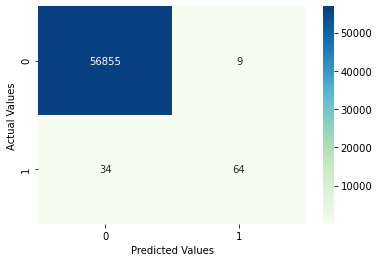

In [47]:
lgreg = LogisticRegression()
lgreg.fit(x_train, y_train)
y_pred = lgreg.predict(x_test)

cnf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_mat), annot=True, cmap='GnBu', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

print(classification_report(y_test, y_pred))

#### Feature Importance

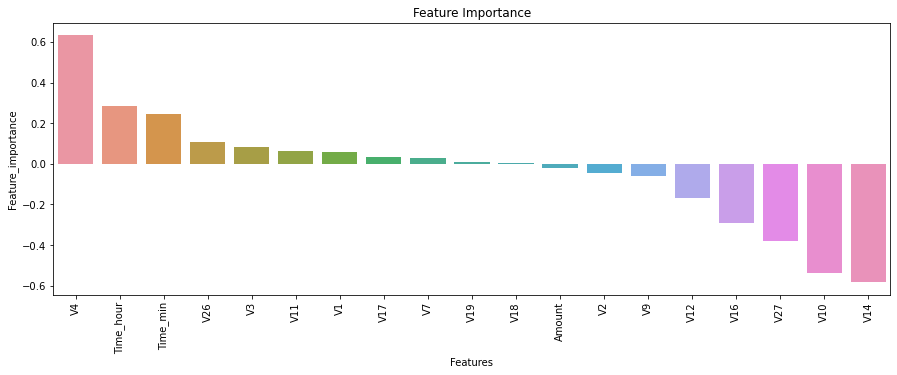

In [64]:
feats = pd.DataFrame({'Features' : x_train.columns, 'Feature_importance' : lgreg.coef_[0]})
feats = feats.sort_values(by = 'Feature_importance', ascending = False)
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
sns.barplot(feats.Features, feats.Feature_importance)
plt.xticks(rotation = 90)
plt.show()

### 2. Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.86      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962



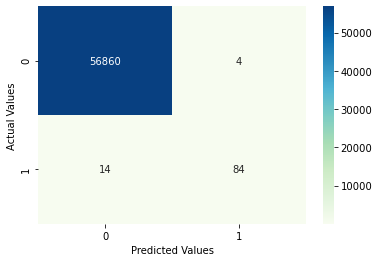

In [52]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

cnf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_mat), annot=True, cmap='GnBu', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

print(classification_report(y_test, y_pred))

#### Feature Importance

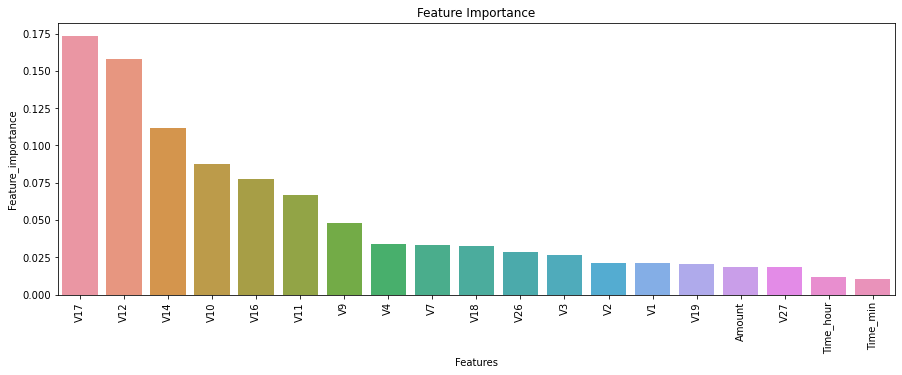

In [55]:
feat = pd.DataFrame({'Features' : x_train.columns, 'Feature_importance' : rfc.feature_importances_})
feat = feat.sort_values(by = 'Feature_importance', ascending = False)
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
sns.barplot(feat.Features, feat.Feature_importance)
plt.xticks(rotation = 90)
plt.show()

As we can see these are not a good model, because it is biased towards majority class and the recall in minority class is not as high as desired

## Applying Synthetic Minority Oversampling TEchnique (SMOTE)

Shape of X_train:  (227845, 19) 
 Count of label 1 before Oversampling: 394 
 Count of label 0 before Oversampling: 227451
Shape of X_smote:  (454902, 19) 
 Count of label 1 after Oversampling: 227451 
 Count of label 0 after Oversampling: 227451


<AxesSubplot:ylabel='count'>

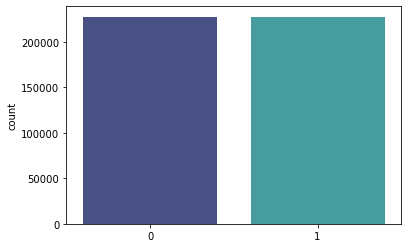

In [66]:
from imblearn.over_sampling import SMOTE

print('Shape of X_train: ', x_train.shape, '\n', 'Count of label 1 before Oversampling: {}'.format(sum(y_train == 1)),
     '\n', 'Count of label 0 before Oversampling: {}'.format(sum(y_train == 0)))

sm = SMOTE(random_state = 7)
x_smote, y_smote = sm.fit_sample(x_train, y_train.ravel())

print('Shape of X_smote: ', x_smote.shape, '\n', 'Count of label 1 after Oversampling: {}'.format(sum(y_smote == 1)),
     '\n', 'Count of label 0 after Oversampling: {}'.format(sum(y_smote == 0)))

sns.countplot(y_smote, palette='mako')

Now the dataset is balanced, so we can build our Classification model with SMOTE. One important thing to point out here is that we should use SMOTE after cross validation in order to avoid data leakage problem and hence overfitting

### 1. Logistic Regression with SMOTE

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



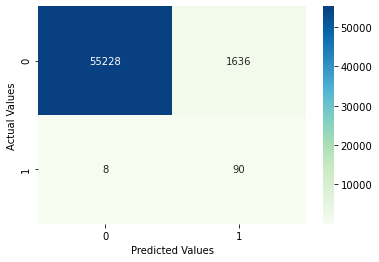

In [67]:
lgreg = LogisticRegression()
lgreg.fit(x_smote, y_smote)
y_pred = lgreg.predict(x_test)

cnf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_mat), annot=True, cmap='GnBu', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

print(classification_report(y_test, y_pred))

We got a high recall which means our model is able to detect the highest number of fraud transactions, while the precision is very low which is not good because it means that the model classifies a lot of non-fraud transactions as fraud.  
So in this case it's also important to have a high precision, which we are going to try to achieve with Random Forest

#### Precision Recall Curve

Text(0.5, 1.0, 'Precision Recall Curve')

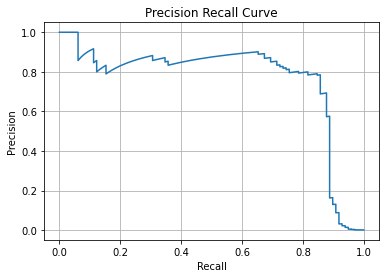

In [85]:
y_score = lgreg.decision_function(x_test)
precision, recall, threshold = precision_recall_curve(y_test, y_score)
plt.figure()
plt.grid()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

#### ROC Curve

AUC score:  0.9639951893813238


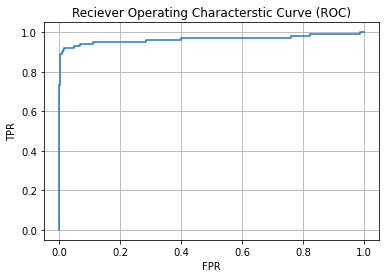

In [89]:
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.figure()
plt.grid()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Reciever Operating Characterstic Curve (ROC)')
print('AUC score: ', roc_auc_score(y_test, y_score))

### 2. Random Forest Classifier with SMOTE

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.86      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



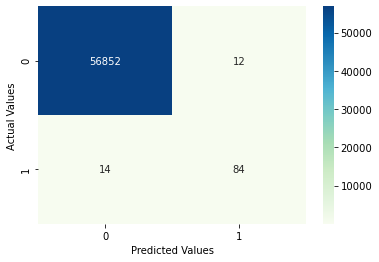

In [128]:
rfc = RandomForestClassifier()
rfc.fit(x_smote, y_smote)
y_pred = rfc.predict(x_test)

cnf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_mat), annot=True, cmap='GnBu', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

print(classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Precision Recall Curve')

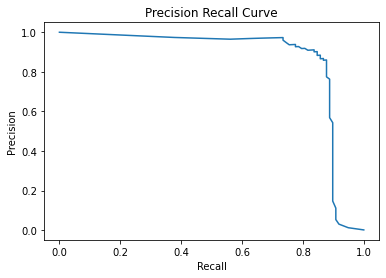

In [129]:
y_score = rfc.predict_proba(x_test)[:,1]
precision, recall, thres = precision_recall_curve(y_test, y_score)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [130]:
print('ROC AUC Score: ', roc_auc_score(y_test, y_score))

ROC AUC Score:  0.9680565265639176


So Random Forest with SMOTE performed better than Logistic Regression overall allowing us to get high recall and high precision at the same time. Even though the recall has decreased a little bit, we were able to increase the precision significantly, which means it is a good trade-off.

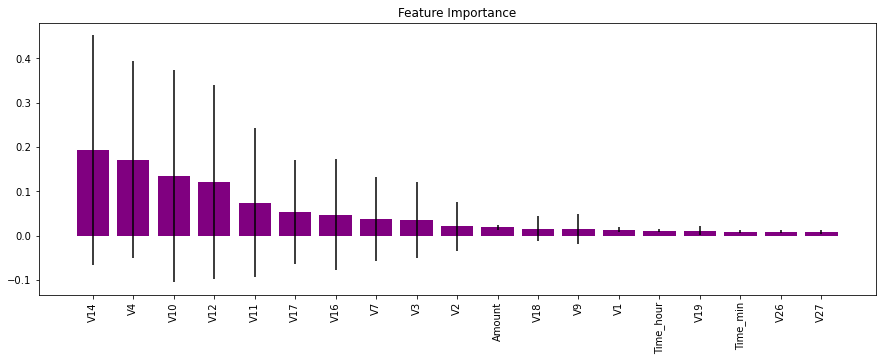

In [125]:
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(rfc.feature_importances_)[::-1]

plt.figure(figsize = (15,5))
plt.title('Feature Importance')
plt.bar(x_smote.columns[indices], rfc.feature_importances_[indices], yerr = std[indices], color= 'purple')
plt.xticks(rotation = 90)
plt.show()

### 3. ADABoost Classifier with SMOTE

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.94      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.56     56962
weighted avg       1.00      0.98      0.99     56962



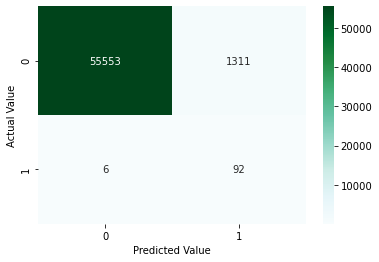

In [126]:
ada = AdaBoostClassifier(learning_rate = 0.7)
ada.fit(x_smote, y_smote)
y_pred = ada.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'BuGn', fmt = 'g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
print(classification_report(y_test, y_pred))

In [127]:
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

ROC AUC Score:  0.9578602508814443


The ROC-AUC score obtained with AdaBoostClassifier is 0.958.  
We obtain a better Recall with AdaBoost Classifier but precision is far worse than what we obtained for RandomForrest.  


Text(0.5, 1.0, 'Feature Importance for AdaBoost Classifier')

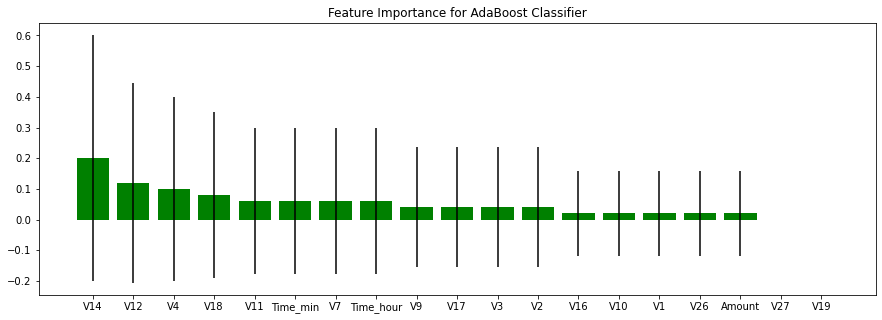

In [131]:
std = np.std([tree.feature_importances_ for tree in ada.estimators_], axis=0)
ind = np.argsort(ada.feature_importances_)[::-1]

plt.figure(figsize=(15,5))
plt.bar(x_smote.columns[ind], ada.feature_importances_[ind], yerr=std[ind], color = 'green')
plt.title('Feature Importance for AdaBoost Classifier')

### 4. XGBoost

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.87      0.31        98

    accuracy                           0.99     56962
   macro avg       0.60      0.93      0.66     56962
weighted avg       1.00      0.99      1.00     56962



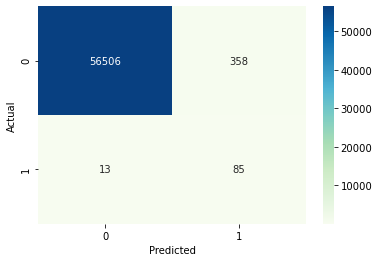

In [133]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators = 50, max_depth = 12, learning_rate = 0.01)
model.fit(x_smote, y_smote)
y_pred = model.predict(x_test)

cf_m = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_m), annot=True, cmap='GnBu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test, y_pred))

In [134]:
print('ROC AUC Score for XGBoost: ', roc_auc_score(y_test, y_pred))

ROC AUC Score for XGBoost:  0.9305256078233206


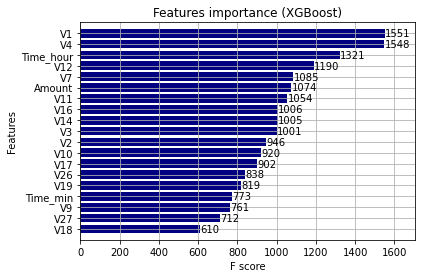

In [136]:
#fig, ax = plt.subplots(figsize=(15,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", color="navy") 
plt.show()

### Conclusion

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. The dataset was severely imbalanced with 99.83% not fraud cases. The data was remodeled using Synthetic Minority Oversampling TEchnique (SMOTE) from ibmlearn library, to convert highly imbalanced data set into a balaced one with 50-50 share of fraud and non-fraud cases.

With Logistic Regression, we were able to improve Recall Score using SMOTE from **0.65** to **0.92**. We obtained an AUC score of **0.964** for test set. Although we recieved a low precision score, which was improved in our subsequent models.

We started with **RandomForrestClassifier**, for which we obtained an AUC scode of **0.968** when predicting the target for the test set.  

We followed with an **AdaBoostClassifier** model, with lower AUC score (**0.958**) for prediction of the test set target values. 

We then experimented with a **XGBoost** model. We used the model with the best training step, to predict target value from the test data; the AUC score obtained was **0.93**.